# Mini-Project 1 
## Traveling salesman problem using Minimum-Spanning Tree heuristic 

This project is based on material from Chapter 3 Solving Problems by Searching. You will need to review that material on your own. 

The traveling salesperson problem (TSP) can be formulated as a search problem and A* search can be used  with the minimum-spanning-tree (MST) heuristic. This heuristic estimates the cost of completing a tour, given that a partial tour has already been constructed. The MST cost of a set of cities is the smallest sum of the link costs of any tree that connects all the cities.

1. Write a problem generator and visualizer 
for instances of the TSP problem where cities are represented by random points in the unit square (6-10 cities are recommended) **(Basic - 2 points)**
2. Solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities **(Basic - 2 points)**
3. Show and describe how the MST heuristic can be derived from a relaxed version of the TSP **(Expected - 2 points)**
4. Compare the average time (total number of nodes generated) and space (largest size of frontier) complexity for BFS and DFS when running your search algorithm. **(Expected - 2 points)**
4. Find an efficient algorithm in the literature for constructing the MST, and use it with A* graph search to solve instances of the TSP. **(Advanced - 2 points)**


### Problem Generator

- At the beginning let's create a problem generator algorithm so that we can visulize the TSP problem where cities are represented by random points in the unit square 

In [1]:
import random
def problemGenerator(nCities):
    tsp = []
    for i in range(nCities):
        distances = []
        for j in range(nCities):
            if j == i:
                distances.append(0)
            elif j < i:
                distances.append(tsp[j][i])
            else:
                distances.append(random.randint(10, 1000))
        tsp.append(distances)
    return tsp


#### Visualizer for instances of the TSP problem where cities are represented by random points
#### in the unit square (6-10 cities are recommended)

In [2]:
problemGenerator(6)

[[0, 700, 603, 899, 894, 489],
 [700, 0, 833, 91, 76, 338],
 [603, 833, 0, 657, 205, 726],
 [899, 91, 657, 0, 989, 172],
 [894, 76, 205, 989, 0, 571],
 [489, 338, 726, 172, 571, 0]]

- Now, we try to solve the path problem of visiting all cities using the two main uninformed search strategies (BFS and DFS) and display your solution as a path between the cities

####  Depth-first search (DFS) is an algorithm for traversing or searching tree or graph data structures. The algorithm starts at the root node (selecting some arbitrary node as the root node in the case of a graph) and explores as far as possible along each branch before backtracking.

- A version of depth-first search was investigated in the 19th century by French mathematician Charles Pierre Trémaux as a strategy for solving mazes.

#### Example

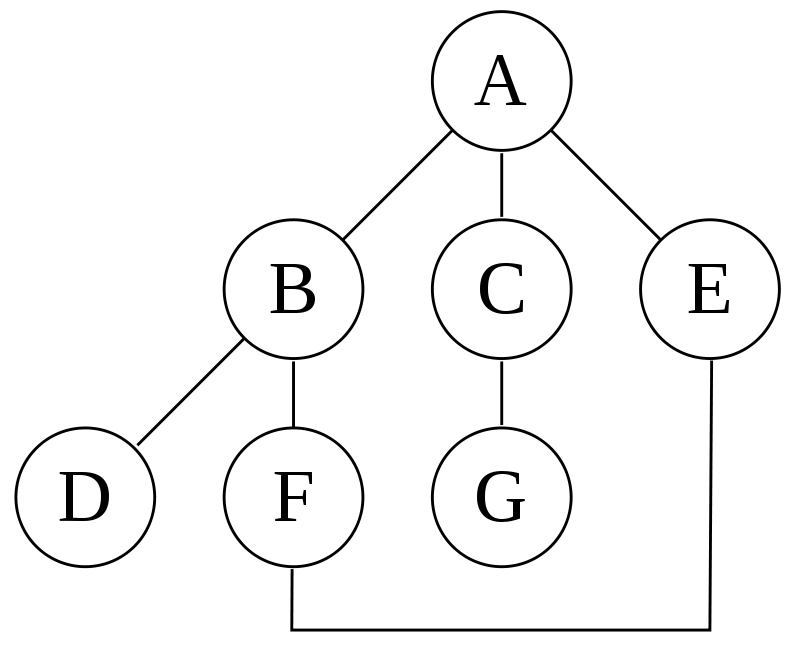

- a depth-first search starting at the node A, assuming that the left edges in the shown graph are chosen before right edges, and assuming the search remembers previously visited nodes and will not repeat them (since this is a small graph), will visit the nodes in the following order: A, B, D, F, E, C, G. The edges traversed in this search form a Trémaux tree, a structure with important applications in graph theory. Performing the same search without remembering previously visited nodes results in visiting the nodes in the order A, B, D, F, E, A, B, D, F, E, etc. forever, caught in the A, B, D, F, E cycle and never reaching C or G.Iterative deepening is one technique to avoid this infinite loop and would reach all nodes.

### DFS Method

In [3]:
#Graph representation
adj_list = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["B","F"],
    "D":[],
    "E":["F"],
    "F":[],
    
}

In [4]:
#Reuired array and dictionary
color = {} #W, G, B
parent = {}
trav_time = {}  #[start, end]
dfs_traversal_output = []
time = 0

#initialize
for node in adj_list.keys():
    color[node] = "W"
    parent[node] = None
    trav_time[node] = [-1,1]
    time +=1
    

def dfs_util(u):
    global time
    color[u]= "G"
    trav_time[u][0]=time
    dfs_traversal_output.append(u)
    
    for v in adj_list[u]:
        if color[v] == "W":
            parent[v] = u
            dfs_util(v)
            
    color[u] = "B"
    trav_time[u][1] = time
    time +=1
    
dfs_util("A")
print(dfs_traversal_output)
print(parent)
print(trav_time)
    

['A', 'B', 'D', 'E', 'F', 'C']
{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'E'}
{'A': [6, 11], 'B': [6, 9], 'C': [10, 10], 'D': [6, 6], 'E': [7, 8], 'F': [7, 7]}


In [5]:
for node in adj_list.keys():
    print(node, " ->", trav_time[node])

A  -> [6, 11]
B  -> [6, 9]
C  -> [10, 10]
D  -> [6, 6]
E  -> [7, 8]
F  -> [7, 7]


In [6]:
#shortest path of from any node from source node

v = "F"
path = []
while v is not None:
    path.append(v)
    v = parent[v]
    
path.reverse()

print(path)

['A', 'B', 'E', 'F']


### BFS Method

#### Breadth-first search (BFS) is an algorithm for searching a tree data structure for a node that satisfies a given property. It starts at the tree root and explores all nodes at the present depth prior to moving on to the nodes at the next depth level. Extra memory, usually a queue, is needed to keep track of the child nodes that were encountered but not yet explored.

- For example, in a chess endgame a chess engine may build the game tree from the current position by applying all possible moves, and use breadth-first search to find a win position for white. Implicit trees (such as game trees or other problem-solving trees) may be of infinite size; breadth-first search is guaranteed to find a solution node[1] if one exists.

- In contrast, (plain) depth-first search, which explores the node branch as far as possible before backtracking and expanding other nodes,[2] may get lost in an infinite branch and never make it to the solution node. Iterative deepening depth-first search avoids the latter drawback at the price of exploring the tree's top parts over and over again. On the other hand, both depth-first algorithms get along without extra memory.

- Breadth-first search can be generalized to graphs, when the start node (sometimes referred to as a 'search key') is explicitly given, and precautions are taken against following a vertex twice.

In [7]:
#Graph representation
adj_list = {
    "A":["B","C"],
    "B":["D","E"],
    "C":["B","F"],
    "D":[],
    "E":["F"],
    "F":[],
    
}

In [8]:
#bfs code
from queue import Queue
color = {} #W, G, B
trav_time = {}  #[start, end]
visited = {}
level = {} #distance dictionary
parent = {}
bfs_traversal_output = []
queue = Queue()

time = 0

for node in adj_list.keys():
    visited[node] = False
    parent[node] = None
    level[node] = -1 
    color[node] = "W"
    trav_time[node] = [-1,1]
    time +=1
    
s = "A"
visited[s] = True
level[s] = 0
queue.put(s)



while not queue.empty():
    u = queue.get()
    global time
    color[u]= "G"
    trav_time[u][0]=time
    
    bfs_traversal_output.append(u)
    
    for v in adj_list[u]:
        if not visited[v]:
            visited[v] = True
            parent[v] = u
            level[v] = level[u] + 1
            queue.put(v)
    color[u] = "B"
    trav_time[u][1] = time
    time +=1
            
print(bfs_traversal_output)
print(parent)
print(trav_time)

['A', 'B', 'C', 'D', 'E', 'F']
{'A': None, 'B': 'A', 'C': 'A', 'D': 'B', 'E': 'B', 'F': 'C'}
{'A': [6, 6], 'B': [7, 7], 'C': [8, 8], 'D': [9, 9], 'E': [10, 10], 'F': [11, 11]}


In [9]:
#sortest distance of all nodes from source node 
print(level)

{'A': 0, 'B': 1, 'C': 1, 'D': 2, 'E': 2, 'F': 2}


In [10]:
#shortest path of from any node from source node

v = "F"
path = []
while v is not None:
    path.append(v)
    v = parent[v]
    
path.reverse()

print(path)

['A', 'C', 'F']


In [11]:
for node in adj_list.keys():
    print(node, " ->", trav_time[node])

A  -> [6, 6]
B  -> [7, 7]
C  -> [8, 8]
D  -> [9, 9]
E  -> [10, 10]
F  -> [11, 11]


#### DFS:
Time complexity is again O(|V|), you need to traverse all nodes.
Space complexity - depends on the implementation, a recursive implementation can have a O(h) space complexity [worst case], where h is the maximal depth of your tree.
Using an iterative solution with a stack is actually the same as BFS, just using a stack instead of a queue - so you get both O(|V|) time and space complexity.
In our case of 6 city problem, time complexity is 4 and space complexity is 4. 

#### BFS:
Time complexity is O(|V|), where |V| is the number of nodes. You need to traverse all nodes.
Space complexity is O(|V|) as well - since at worst case you need to hold all vertices in the queue.
In our case of 6 city problem, time complexity is 3 and space complexity is 3. 



So, we can conclude that BFS algorithm is the best choice for our case.

In [12]:
# A Python program for Prim's Minimum Spanning Tree (MST) algorithm.
# The program is for adjacency matrix representation of the graph
 
import sys # Library for INT_MAX
 
class Graph():
 
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                    for row in range(vertices)]
 
    # A utility function to print the constructed MST stored in parent[]
    def printMST(self, parent):
        print ("Edge \tWeight")
        for i in range(1, self.V):
            print (parent[i], "-", i, "\t", self.graph[i][parent[i]])
 
    # A utility function to find the vertex with
    # minimum distance value, from the set of vertices
    # not yet included in shortest path tree
    def minKey(self, key, mstSet):
 
        # Initialize min value
        min = sys.maxsize
 
        for v in range(self.V):
            if key[v] < min and mstSet[v] == False:
                min = key[v]
                min_index = v
 
        return min_index
 
    # Function to construct and print MST for a graph
    # represented using adjacency matrix representation
    def primMST(self):
 
        # Key values used to pick minimum weight edge in cut
        key = [sys.maxsize] * self.V
        parent = [None] * self.V # Array to store constructed MST
        # Make key 0 so that this vertex is picked as first vertex
        key[0] = 0
        mstSet = [False] * self.V
 
        parent[0] = -1 # First node is always the root of
 
        for cout in range(self.V):
 
            # Pick the minimum distance vertex from
            # the set of vertices not yet processed.
            # u is always equal to src in first iteration
            u = self.minKey(key, mstSet)
 
            # Put the minimum distance vertex in
            # the shortest path tree
            mstSet[u] = True
 
            # Update dist value of the adjacent vertices
            # of the picked vertex only if the current
            # distance is greater than new distance and
            # the vertex in not in the shortest path tree
            for v in range(self.V):
 
                # graph[u][v] is non zero only for adjacent vertices of m
                # mstSet[v] is false for vertices not yet included in MST
                # Update the key only if graph[u][v] is smaller than key[v]
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                        key[v] = self.graph[u][v]
                        parent[v] = u
 
        self.printMST(parent)
 
g = Graph(5)
g.graph = [ [0, 899, 618, 806, 935, 772],
        [899, 0, 584, 589, 129, 741],
        [618, 584, 0, 822, 704, 126],
        [806, 589, 822, 0, 699, 285],
        [935, 129, 704, 699, 0, 527],
        [772, 741, 126, 285, 527, 0]]
 
g.primMST();
 


Edge 	Weight
2 - 1 	 584
0 - 2 	 618
1 - 3 	 589
1 - 4 	 129


####  Efficient algorithm bfs, and using it with A* graph search to solve instances of the TSP. 

In [17]:
from collections import deque

class Graph:
    # example of adjacency list (or rather map)
    adj_list = {
    "A": [6, 6], 
    "B": [7, 7], 
    "C": [8, 8], 
    "D": [9, 9], 
    "E": [10, 10], 
    "F": [11, 11]
    
}

    def __init__(self, adj_list):
        self.adj_list = adj_list

    def get_neighbors(self, v):
        return self.adj_list[v]

    # heuristic function with equal values for all nodes
    def h(self, n):
        H = {
            'A': 1,
            'B': 1,
            'C': 1,
            'D': 1,
            'E': 1,
            'F': 1,
            
        }

        return H[n]

    def a_star_algorithm(self, start_node, stop_node):
        # open_list is a list of nodes which have been visited, but who's neighbors
        # haven't all been inspected, starts off with the start node
        # closed_list is a list of nodes which have been visited
        # and who's neighbors have been inspected
        open_list = set([start_node])
        closed_list = set([])

        # g contains current distances from start_node to all other nodes
        # the default value (if it's not found in the map) is +infinity
        g = {}

        g[start_node] = 0

        # parents contains an adjacency map of all nodes
        parents = {}
        parents[start_node] = start_node

        while len(open_list) > 0:
            n = None

            # find a node with the lowest value of f() - evaluation function
            for v in open_list:
                if n == None or g[v] + self.h(v) < g[n] + self.h(n):
                    n = v;

            if n == None:
                print('Path does not exist!')
                return None

            # if the current node is the stop_node
            # then we begin reconstructin the path from it to the start_node
            if n == stop_node:
                reconst_path = []

                while parents[n] != n:
                    reconst_path.append(n)
                    n = parents[n]

                reconst_path.append(start_node)

                reconst_path.reverse()

                print('Path found: {}'.format(reconst_path))
                return reconst_path

            # for all neighbors of the current node do
            for (m, weight) in self.get_neighbors(n):
                # if the current node isn't in both open_list and closed_list
                # add it to open_list and note n as it's parent
                if m not in open_list and m not in closed_list:
                    open_list.add(m)
                    parents[m] = n
                    g[m] = g[n] + weight

                # otherwise, check if it's quicker to first visit n, then m
                # and if it is, update parent data and g data
                # and if the node was in the closed_list, move it to open_list
                else:
                    if g[m] > g[n] + weight:
                        g[m] = g[n] + weight
                        parents[m] = n

                        if m in closed_list:
                            closed_list.remove(m)
                            open_list.add(m)

            # remove n from the open_list, and add it to closed_list
            # because all of his neighbors were inspected
            open_list.remove(n)
            closed_list.add(n)

        print('Path does not exist!')
        return None

In [19]:
adj_list = {
    'A': [('B', 7), ('C', 8), ('D', 9)],
    'B': [('D', 10)],
    'C': [('D', 11)]
}

graph1 = Graph(adj_list)
graph1.a_star_algorithm('A', 'D')


Path found: ['A', 'D']


['A', 'D']